# Project: albb-saleries 2003 analysis

## Introduction

### Dataset Description 

This dataset is a data of salaries of players of baseball in year 2003

### Question(s) for Analysis :

1-how many team in the data

2-what are the positions of players? and show how many player in each position

3- what is the most and least team which have players

4-what is the most team which pays money in salaries and what the avereage of it payment

5-who is the player whose greatest salary? and get all information about him .

6- show the top greatest 20 salary of players and there positions

7-how much salary of each position? and show which position have the greatest

8-did the salaries of players is approximate 

9- show the statistics of salaries 


In [338]:
# Load your data and print out a few lines. Perform operations to inspect data
# import the libraries that you use
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [339]:
# load the data
df = pd.read_csv('albb-saleries in USA.csv').sort_values(['Salary'],ascending=False)

In [340]:
# print out a few lines
df.head()

,Team,player name,first name,second name,Salary,Position
371,Texas Rangers,Alex Rodriguez,Alex,Rodriguez,22000000.0,Shortstop
76,Boston Red Sox,Manny Ramirez,Manny,Ramirez,20000000.0,Outfielder
117,Toronto Blue Jays,Carlos Delgado,Carlos,Delgado,18700000.0,First Baseman
8,New York Yankees,Derek Jeter,Derek,Jeter,15600000.0,Shortstop
68,Boston Red Sox,Pedro Martinez,Pedro,Martinez,15500000.0,Pitcher


### Accessing and cleaning data

In [341]:
# the shape of the dataframe
df.shape

(381, 6)

In [342]:
# show the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 371 to 190
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Team         381 non-null    object 
 1   player name  381 non-null    object 
 2   first name   381 non-null    object 
 3   second name  381 non-null    object 
 4   Salary       381 non-null    float64
 5   Position     381 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.8+ KB


#### it is clear that there is no null values 

In [343]:
# check the duplicated values 
sum(df.duplicated())

0

#### then , there is no any duplicates

In [344]:
# drop the columns that we don`t need it in analysis
df.drop(['first name','second name'],axis = 1, inplace=True)

#### The data is really clean now and there is no null or duplicated values 
#### ok,we can continue now

## Exploratory Data Analysis

### how many team in the data

In [345]:
df['Team'].nunique()

14

there are 14 team in the data

### what are the positions of players? and show how many player in each position

In [346]:
df.Position.unique()

array(['Shortstop', 'Outfielder', 'First Baseman', 'Pitcher',
       'Third Baseman', 'Catcher', 'Second Baseman'], dtype=object)

##### then the positions are ['Shortstop', 'Outfielder', 'First Baseman', 'Pitcher','Third Baseman', 'Catcher', 'Second Baseman']

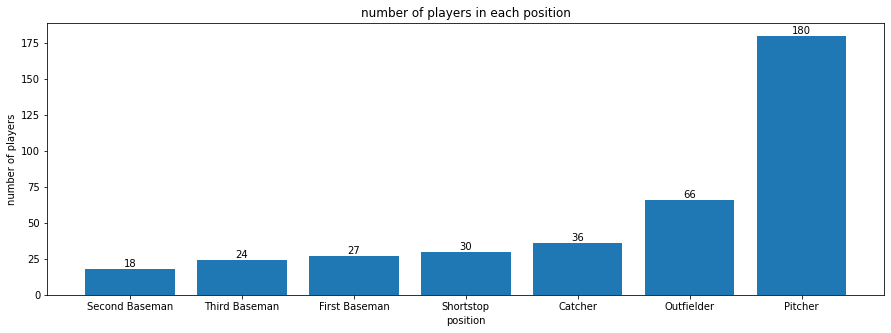

In [347]:
df_pos_players = pd.DataFrame(df.groupby('Position')['player name'].count()).sort_values(['player name'],ascending=True)
y =list(df_pos_players['player name'].values)
x = list(df_pos_players.index)
plt.figure(figsize = (15,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.ylabel('number of players')
plt.xlabel('position')
plt.title('number of players in each position')
plt.show();

### what is the most and least team which have players

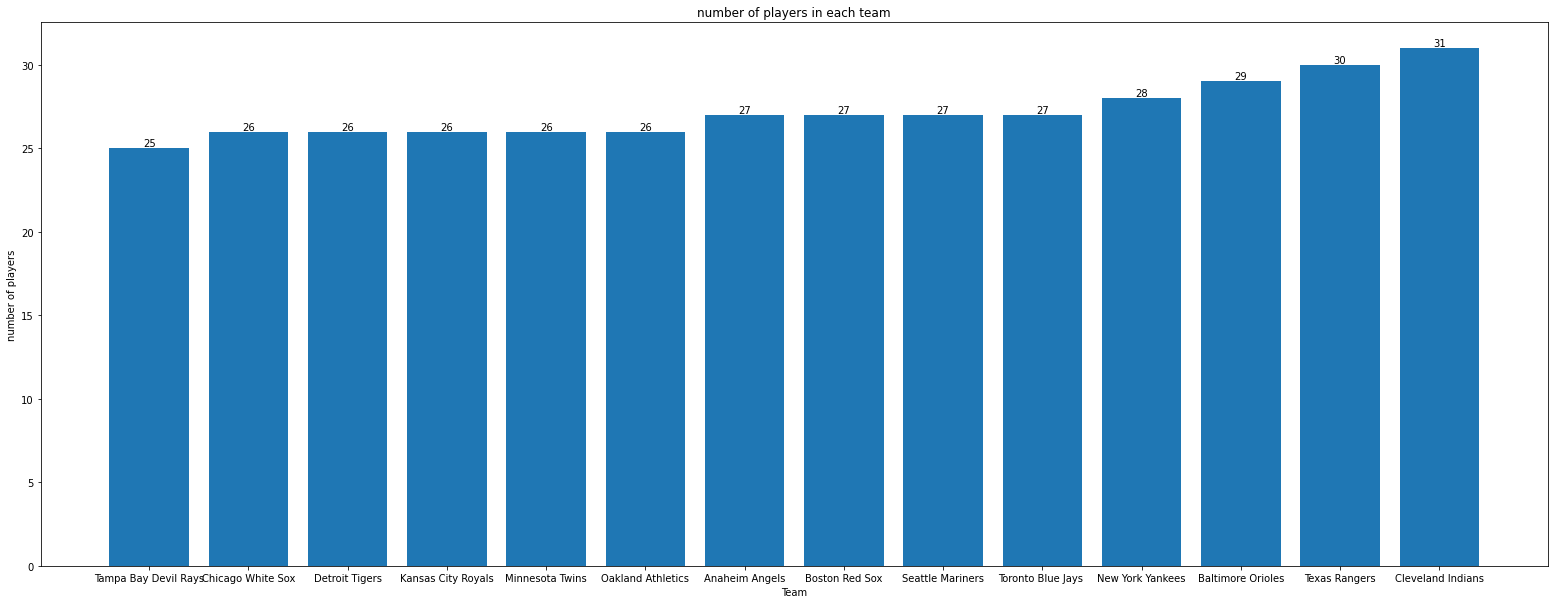

In [348]:
df_team_player = pd.DataFrame(df.groupby('Team')['player name'].count()).sort_values(['player name'],ascending=True)
x = list(df_team_player.index)
y = list(df_team_player['player name'].values)
plt.figure(figsize = (27,10))
plt.rcParams.update({'font.size': 10})
plt.bar(x, y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.ylabel('number of players')
plt.xlabel('Team')
plt.title('number of players in each team')
plt.show();

##### then the most team have a players is "Cleveland Indians" and the least team is "Tampa Bay Devil Ray"

### what is the most team which pays money in salaries and what the avereage of it payment

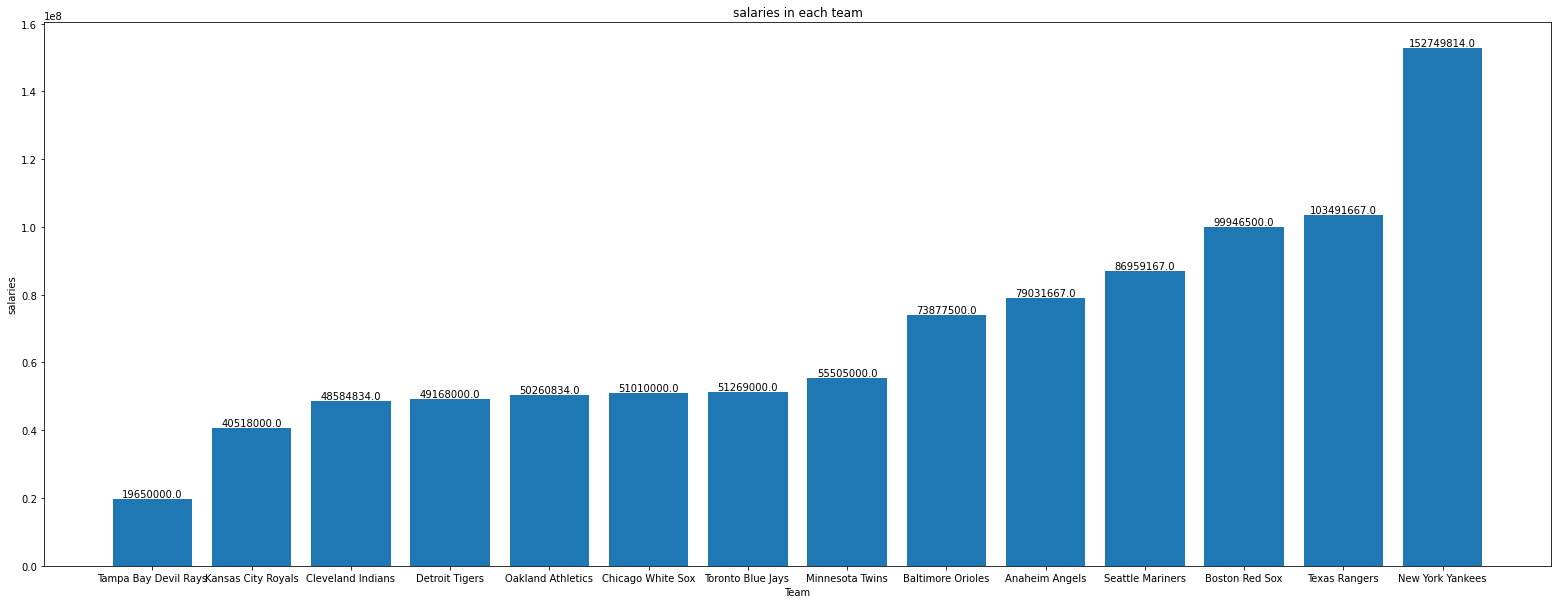

In [349]:
df_money_team = pd.DataFrame(df.groupby('Team')['Salary'].sum()).sort_values(['Salary'],ascending=True)
x = list(df_money_team.index)
y = list(df_money_team['Salary'].values)
plt.figure(figsize = (27,10))
plt.rcParams.update({'font.size': 10})
plt.bar(x, y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.ylabel('salaries')
plt.xlabel('Team')
plt.title('salaries in each team')
plt.show();

##### Then the most team which paid money in salaries is "New York Yankees " and It paid 152749814.0 $

### who is the player whose greatest salary? and get all information about him .

In [350]:
df[df['Salary'] == df.groupby('player name')['Salary'].sum().max()]

,Team,player name,Salary,Position
371,Texas Rangers,Alex Rodriguez,22000000.0,Shortstop


##### Then the player name is 'Alex Rodriguez' , his position is 'shortstop' and he plays in 'Texas Rangers' team 
##### and takes salary 22000000.0 $ 

### show the top greatest 20 salary of players and there positions

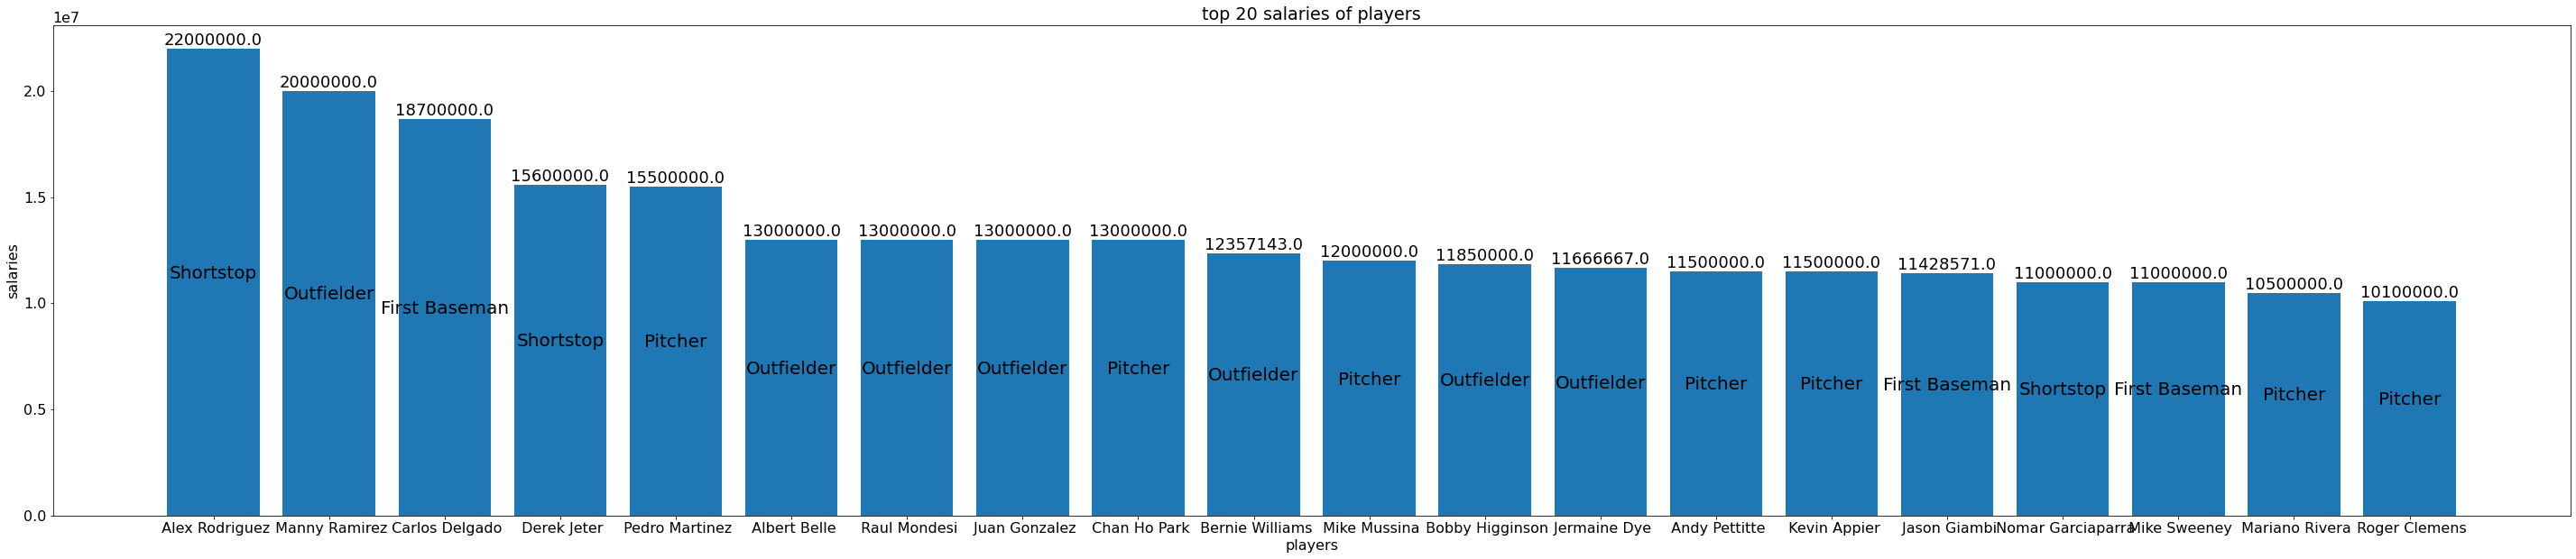

In [351]:
df_salary_player = pd.DataFrame(df.groupby(['player name','Position'],as_index = False)['Salary'].sum()).sort_values(['Salary'],ascending=False).head(20)
x = list(df_salary_player['player name'].values)
y = list(df_salary_player['Salary'].values)
z = list(df_salary_player['Position'].values)
plt.figure(figsize = (50,10))
plt.rcParams.update({'font.size':16})
plt.bar(x, y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom',fontsize=18)
    plt.text(i,y[i]/2,z[i], ha ='center', va= 'bottom',fontsize=20)
plt.ylabel('salaries')
plt.xlabel('players')
plt.title('top 20 salaries of players')
plt.show();

### how much salary of each position? and show which position have the greatest

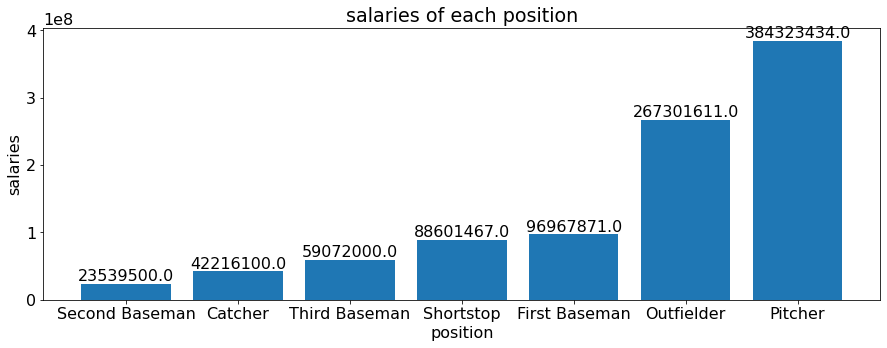

In [352]:
df_pos_salary = pd.DataFrame(df.groupby('Position')['Salary'].sum()).sort_values(['Salary'],ascending=True)
y =list(df_pos_salary['Salary'].values)
x = list(df_pos_salary.index)
plt.figure(figsize = (15,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.ylabel('salaries')
plt.xlabel('position')
plt.title('salaries of each position')
plt.show();

### did the salaries of players is approximate ?

##### to answer this question we should measure the mean and standard deviation between salaries

In [353]:
print ("the mean of salaries equal",df.Salary.mean() , "and the std of salaries equal" ,df.Salary.std() )

the mean of salaries equal 2524992.0813648296 and the std of salaries equal 3487394.5482523087


##### clearly the std is a huge number so the salaries of players is approximate and there are outliers in salaries

### show the statistics of salaries 

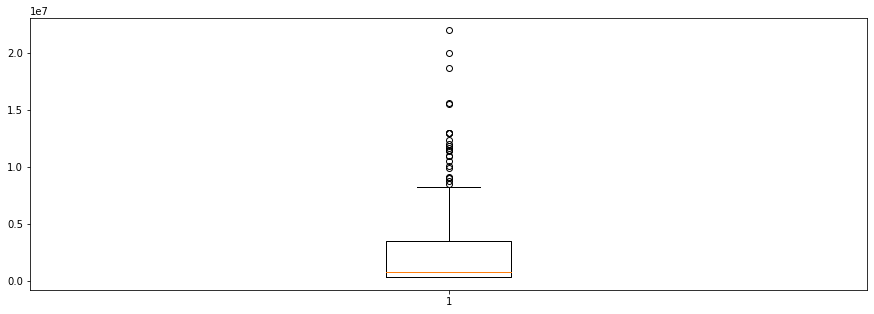

In [354]:
plt.figure(figsize = (15,5))
plt.rcParams.update({'font.size': 10})
plt.boxplot(df.Salary)
plt.show();

#### from the last figure it is clearly that there are outliers in salaries 
#### also we get that the salary is right sekewed

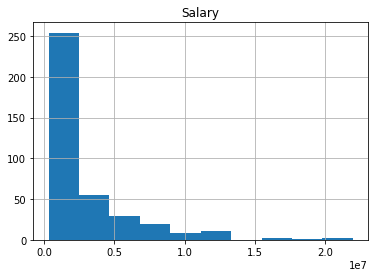

In [355]:
df.hist();

#### the descriptive satatistics of salary is 

In [356]:
df.Salary.describe()

count    3.810000e+02
mean     2.524992e+06
std      3.487395e+06
min      3.000000e+05
25%      3.150000e+05
50%      7.500000e+05
75%      3.500000e+06
max      2.200000e+07
Name: Salary, dtype: float64

## Ok, here we finished our analysis process
